### Component Separation Using Bayesian Methods



## Simple Test Case
Before we move on to any real data, let us take a step back and look at a couple ways to solve for parameters from a distribution. 

First let us draw 1000 samples from a Gaussian distribution and look at a histogram of the result. 

As a reminder, a Gaussian distribution for parameter $x$ with mean $\mu$ and standard deviation $\sigma$ is given by

\begin{equation}
p(x) = \frac{1}{\sqrt{2 \pi \sigma^2}} e^{-\frac{(x-\mu)^2}{2\sigma^2}}.
\end{equation}

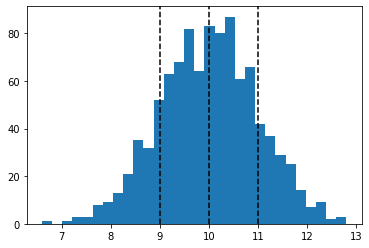

In [1]:
import numpy as np
import matplotlib.pyplot as plt

ndraws = 1000
mu     = 10.
sigma  = 1.

data = np.zeros(ndraws)
for i in range(ndraws):
    data[i] = np.random.normal(mu,sigma)

plt.hist(data,bins=30)
plt.axvline(mu,color='k',linestyle='--')
plt.axvline(mu-sigma,color='k',linestyle='--')
plt.axvline(mu+sigma,color='k',linestyle='--')
plt.show()

Now let us suppose we only have the `data` vector defined above, and want to find the mean value of that data. How do we go about that?

The first step is always to craft a data model. Let us switch to an observational standpoint. We start by assuming that the true value of the data $\mu'$ is a single value who's obserbed value has been obscured by some underlying Gaussian noise, i.e. $x = \mu' + n$ where $x$ is the data, and $n$ is some Gaussian noise. We will generalize this to the following equation, which ought to be baked into your memory

\begin{equation}
d = s + n
\end{equation}

where $d$ is the observed data, $s$ is the true underlying signal, and $n$ is again a noise term. This formalism is the basis of our component separation methods and will be expanded upon further. Down the road.

# Maximum-Likelihood Solution

Now that we have a simple data model, how does one go about actually determining the true underlying signal $s$? A good starting point is by finding what is called the maximum-likelihood solution, using maximum likelihood estimation (MLE). A cursory Google search for maximum likelihood estimation will provide a mix of math heavy resources (like Wikipedia), and some practical examples (like towardsdatascience). 

Here we will stick with a Gaussian assumption, i.e. that the noise inherent in the data has a Gaussian form. 

For any observed point $x_i$, the probability of observing that data point, given the underlying mean ($\mu$) and standard deviation ($\sigma$) of the distribution is given by

$p(x_i|\mu,\,\sigma) = \frac{1}{\sqrt{2 \pi \sigma^2}} e^{-\frac{(x_i-\mu)^2}{2\sigma^2}}$,

and the probability of observing say 3 data points $x_1$, $x_2$, and $x_3$ is given by 

$p(x_1,x_2,x_3|\mu,\,\sigma) = \frac{1}{\sqrt{2 \pi \sigma^2}} e^{-\frac{(x_1-\mu)^2}{2\sigma^2}}\times\frac{1}{\sqrt{2 \pi \sigma^2}} e^{-\frac{(x_2-\mu)^2}{2\sigma^2}}\times\frac{1}{\sqrt{2 \pi \sigma^2}} e^{-\frac{(x_3-\mu)^2}{2\sigma^2}}$.

Let us take all of our observations into account and condense our probability expression (the likelihood) to be

\begin{equation}
p(\vec{x}|\mu,\,\sigma) = {\displaystyle \prod_{i=1}^{1000}}\frac{1}{\sqrt{2 \pi \sigma^2}} e^{-\frac{(x_i-\mu)^2}{2\sigma^2}}
\end{equation}

From our Calculus experience, we may note that a sure fire way to determine the maximum or minimum of a function is by taking its derivative. However we can tell by looking at the above equation that taking the derivative of this thing will be a cumbersome operation.

Those versed in MLE will be quick to point out that taking the natural logarithm of the above expression gives us something nice to work with!

To be explicit, finding the maximum likelihood solution involves finding $\mu$ where
   
\begin{equation}
\frac{\partial \ln (p(\vec{x}|\mu,\,\sigma))}{\partial \mu} = 0
\end{equation}

Task 1: 

-Derive an expression for $\frac{\partial \ln (p(\vec{x}|\mu,\,\sigma))}{\partial \mu} = 0$.

-Given the above expression, find an expression for the mean of the data.

In [2]:
def solve_for_ML(data,sigma):
    samples = np.shape(data)[0]
    
    return 

# Multi-frequency example

As we will see further on, determing the mean of an observable can be aided by (or in practice requires) the addition of multiple data points. As we move more towards a realistic example, we will say that we have observations at multiple frequencies. For a simple example, let's consider some observable which scales linearly with frequency. 

Let's create a new data set, where our observable has a mean value $a_{obs} = \mu$, and each observation frequency has its own noise characterisitic $n_{\nu}$.

When carrying out this multi-frequency analysis, we need to determine a reference frequency $\nu_{\rm ref}$, at which we evaluate the recovered amplitude $a_{obs}$.

Therefore, our new data model will be written as

$d_{\nu} = a_{obs} + b(\nu-\nu_{\rm ref})$,

where $b$ is the slope of the linear relation.

In [14]:
# New variables
nfreq  = 5
nus    = np.asarray([10.,20., 30.,40.,50.])
sigmas = np.asarray([1., 1.5, 1.25, 2., 0.75])

# Remake our data array
data   = np.empty((ndraws,nfreq))

# Slope for linear scaling relation
slope  = 0.75

# Reference frequency
nu_ref = 20.


def scaling(amplitude,frequency,reference):
   return amplitude + slope*(frequency-reference)

x = np.linspace(10,50,100)

means = scaling(mu,nus,20.0)

for i in range(ndraws):
        for j in range(nfreq):
            data[i][j] = scaling(mu,nus[j],nu_ref)+np.random.normal(0.0,sigmas[j])


What does this data look like for us?

<ErrorbarContainer object of 3 artists>

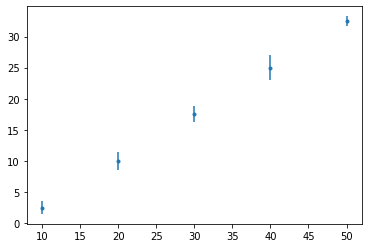

In [18]:
data_mean  = np.empty(nfreq)
data_error = np.empty(nfreq)
for j in range(nfreq):
    data_mean[j]  = np.mean(data.T[j])
    data_error[j] = np.std(data.T[j])
    
plt.errorbar(nus,data_mean,yerr=data_error,fmt='.')

Task 2:

-Generalize the solve_for_ML function to find the mean value of $a_{obs}$.

-Compute the posterior of $a_{obs}$ given the data ($p(a_{obs}|\boldsymbol d)$).

# Draw from Gaussian Distribution

# Metropolis-Hastings Sampler

## Load in the Data

To begin let us load in our simulated sky maps.

We define our data model as:

$d_{\nu} = s_{\nu} + n_{\nu}$

In [ ]:
import healpy as hp

## Component Amplitude Sampling

Begging with t